# **TASK #02**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools 
from matplotlib.pyplot import figure


In [ ]:
digital_data = [1,0,1,0,0,1,1,1,0,1,1,0]
t = np.arange(0,len(digital_data),0.001)
# print(len(t))
highest_amplitude=5
lowest_amplitude=-5

In [ ]:
def plot_graph(t,y,digital_data,title):
  figure(figsize=(15, 6), dpi=80)
  ax = plt.gca()
  ax.set_ylim([-9, 9])
  for i in range(0,len(digital_data)):
    plt.text(0.5+i, 6, digital_data[i], fontsize = 16)


  plt.plot(t,y,color='black',linewidth = '5')
  plt.xticks(np.arange(0,len(digital_data)+1,1))
  plt.title(title)

  plt.axhline(y=0, color='r', linestyle='-')
  for i in range(1,len(digital_data)+1):
    plt.axvline(x=i,linestyle="--",color='red')

  plt.axvline(x=0,color='red')

  plt.show()

def Decoding(y,highest_a , lowest_a):
  index=0
  decoded_signal = []
  for i in range(0,len(digital_data)):
    if y[index*1000+1] == highest_a :
      decoded_signal.append(1)
    else:
      decoded_signal.append(0)
    index = index+1
  print("Decoded Signal : " , decoded_signal)


**Unipolar Non-Return-to-Z:**

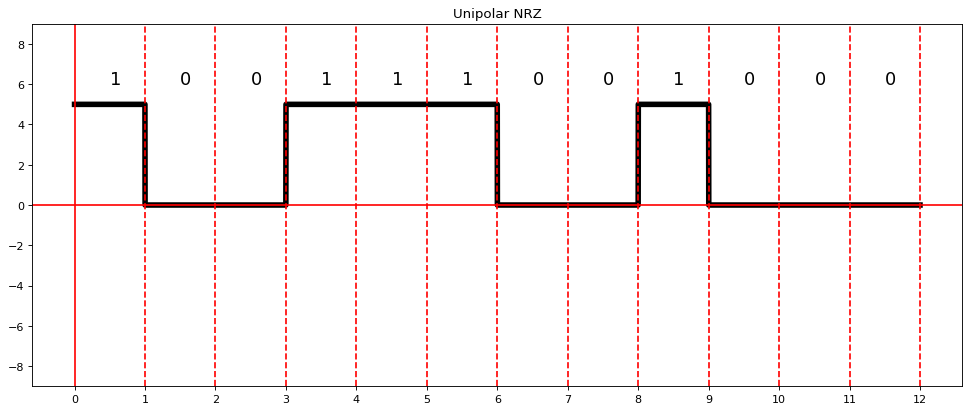

Decoded Signal :  [1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0]


In [ ]:
def Unipolar_NRZ():
  t = np.arange(0,len(digital_data),0.001)
  y = []
  flag = 0
  for i in digital_data :
    if i == 1 :
      for j in np.arange(flag,flag+1,0.001):     
        y.append(highest_amplitude)
      flag=flag+1
    else:
        for j in np.arange(flag,flag+1,0.001):
          y.append(0)
        flag=flag+1
    
  plot_graph(t,y,digital_data,"Unipolar NRZ")
  return y

y=Unipolar_NRZ()
Decoding(y,highest_amplitude,lowest_amplitude)

**Unipolar Return-to-Zero(RZ):**

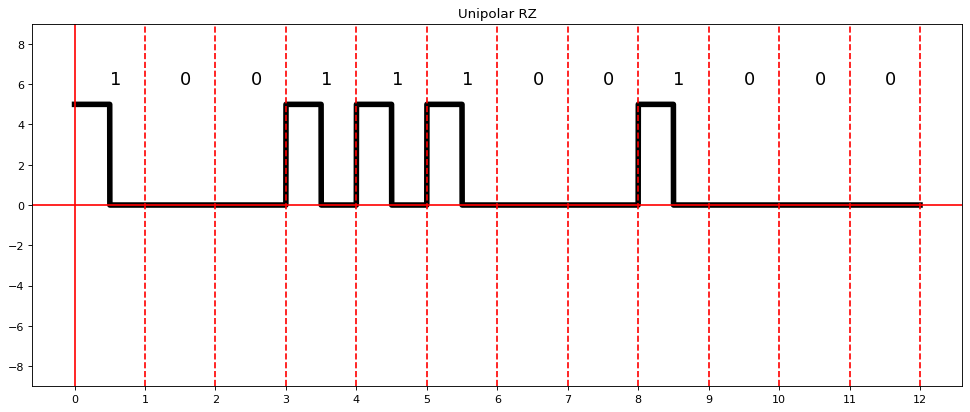

Decoded Signal :  [1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0]


In [ ]:
def Unipolar_RZ():
  t = np.arange(0,len(digital_data),0.001)
  y = []

  flag = 0
  for i in digital_data :
    if i == 1 :
      for j in np.arange(flag,flag+0.5,0.001):     
        y.append(highest_amplitude)
      for j in np.arange(flag+0.5,flag+1,0.001):
        y.append(0)  
      flag=flag+1
    else:
        for j in np.arange(flag,flag+1,0.001):
          y.append(0)   
        flag=flag+1
  plot_graph(t,y,digital_data,'Unipolar RZ')
  return y


y=Unipolar_RZ()
Decoding(y,highest_amplitude,lowest_amplitude)

**Polar NRZ-L:**

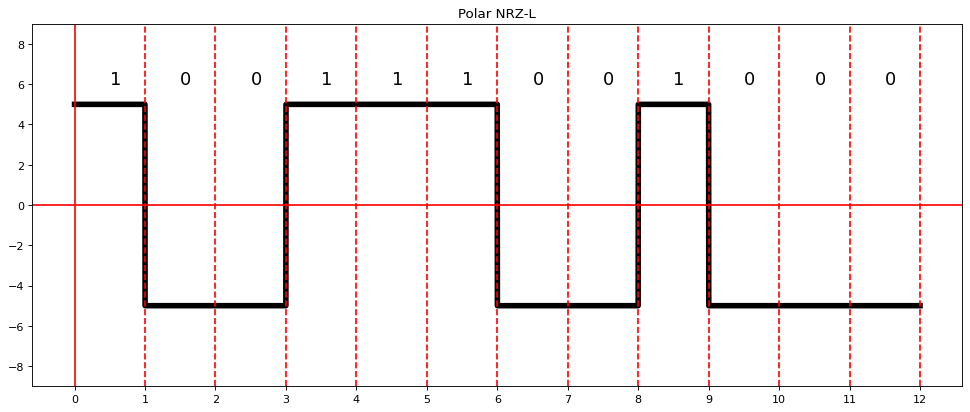

Decoded Signal :  [1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0]


In [ ]:
# highest voltage to represent 1 and lower voltage to represent 0
def Polar_NRZ_L():  
  # digital_data = [1,0,0,1,0,1,1,1,0,0]
  t = np.arange(0,len(digital_data),0.001)
  y = []
  flag = 0
  for i in digital_data :
    if i == 1 :
      for j in np.arange(flag,flag+1,0.001):     
        y.append(highest_amplitude)
      flag=flag+1
    else:
        for j in np.arange(flag,flag+1,0.001):
          y.append(lowest_amplitude)
        flag=flag+1
  plot_graph(t,y,digital_data,'Polar NRZ-L')
  return y


y = Polar_NRZ_L()
Decoding(y,highest_amplitude,lowest_amplitude)



**Polar NRZ-I:**

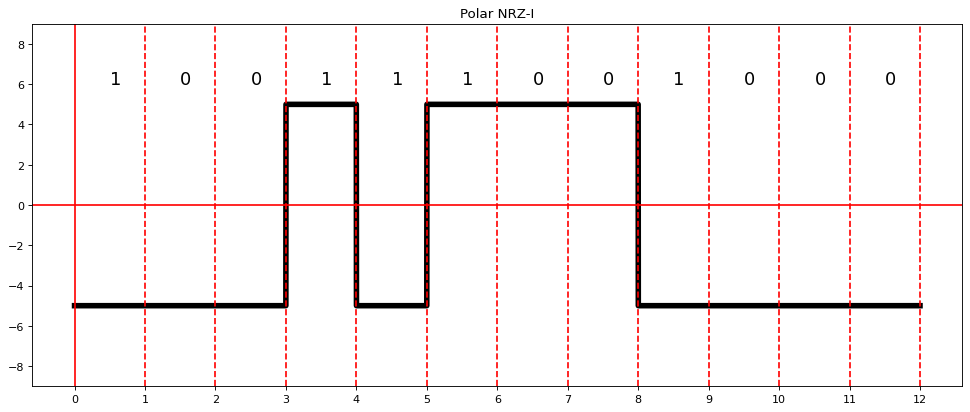

In [ ]:
def Polar_NRZ_I(digital_data):  
  t = np.arange(0,len(digital_data),0.001)
  y = []
  flag = 0
  highest_voltage = highest_amplitude
  lowest_voltage = lowest_amplitude
  prev_voltage=highest_voltage
  for i in digital_data :

    if i == 1 :
      if prev_voltage == lowest_voltage :   
        recent_voltage = highest_voltage
      else:
        recent_voltage = lowest_voltage
      prev_voltage = recent_voltage
      for j in np.arange(flag,flag+1,0.001):
        y.append(recent_voltage)
      flag=flag+1
    else:
      for j in np.arange(flag,flag+1,0.001):     
        y.append(prev_voltage)
      flag=flag+1
  plot_graph(t,y,digital_data,'Polar NRZ-I')
y=Polar_NRZ_I(digital_data)

**Polar RZ:**

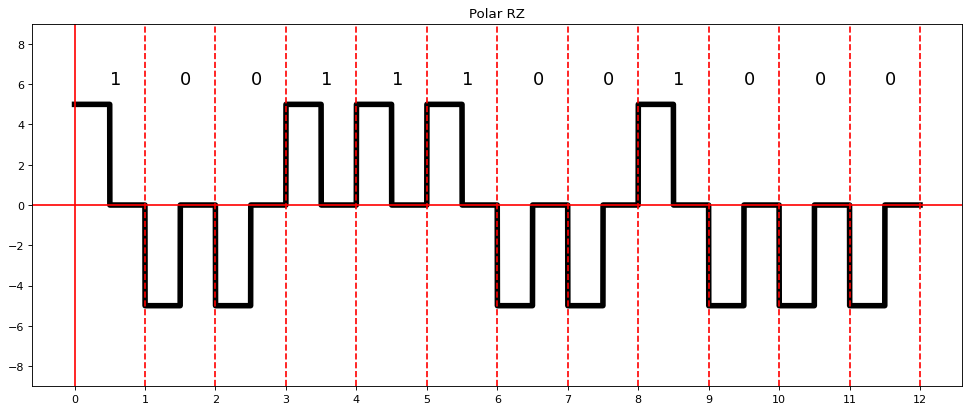

Decoded Signal :  [1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0]


In [ ]:
def Polar_RZ() :
  y = []
  
  flag=0
  for i in digital_data :
    if i == 1:
      for j in np.arange(flag,flag+0.5,0.001) :
         y.append(highest_amplitude)
      flag=flag+0.5
      for j in np.arange(flag,flag+0.5,0.001) :
         y.append(0)
      flag=flag+0.5
    else:

      for j in np.arange(flag,flag+0.5,0.001) :
        y.append(lowest_amplitude)
      flag=flag+0.5
      for j in np.arange(flag,flag+0.5,0.001) :
        y.append(0)
      flag=flag+0.5


  plot_graph(t,y,digital_data,'Polar RZ')
  return y

y=Polar_RZ()
Decoding(y,highest_amplitude,lowest_amplitude)

**Manchester Line Coding:**

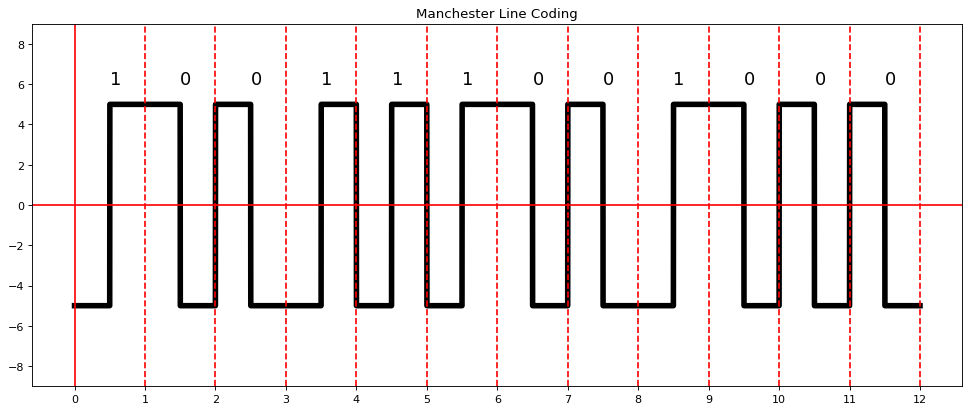

In [ ]:
def Manchester():
  t = np.arange(0,len(digital_data),0.001)
  # print(t[0])
  y = []
  flag = 0
  for i in digital_data :
    if i == 1 :
      for j in np.arange(flag,flag+0.5,0.001):     
        y.append(lowest_amplitude)
      flag=flag+0.5
      for j in np.arange(flag,flag+0.5,0.001):     
        y.append(highest_amplitude)
      flag=flag+0.5
    else:
        for j in np.arange(flag,flag+0.5,0.001):
          y.append(highest_amplitude)
        flag=flag+0.5
        for j in np.arange(flag,flag+0.5,0.001):
          y.append(lowest_amplitude)
        flag=flag+0.5
  plot_graph(t,y,digital_data,'Manchester Line Coding')
  


  
Manchester()

**Differential Manchester Line Coding:**

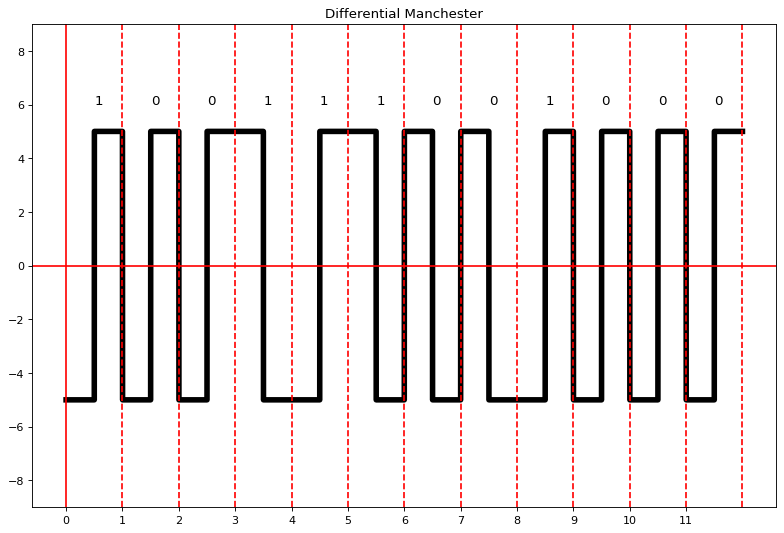

In [ ]:
def Differential_Manchester(digital_data,highest_value,lowest_value):
  t = np.arange(0,len(digital_data)+0.001,0.001)
  y = []
  flag = 0
  
  for index,value in enumerate(digital_data) :
    if index == 0:
      if value == 0:
        y.append(highest_value)
      else:
        y.append(lowest_value)
      
    if value == 0:
      prev_value = y[-1]
      if prev_value == highest_value:
        next_value = lowest_value
      else:
        next_value = highest_value

      for j in np.arange(flag,flag+0.5,0.001):     
        y.append(next_value)
      flag=flag+0.5
      for j in np.arange(flag,flag+0.5,0.001):     
        y.append(prev_value)
      # prev_value = highest_value
      flag=flag+0.5
    else :
      prev_value = y[-1]
      for j in np.arange(flag,flag+0.5,0.001):     
        y.append(prev_value)
      flag=flag+0.5
      if prev_value == highest_value:
        next_value = lowest_value
      else:
        next_value = highest_value
      for j in np.arange(flag,flag+0.5,0.001):     
        y.append(next_value)
      # prev_value = highest_value
      flag=flag+0.5

  
  figure(figsize=(12, 8), dpi=80)
  ax = plt.gca()
  ax.set_ylim([-9, 9])
  for i in range(0,len(digital_data)):
    plt.text(0.5+i, 6, digital_data[i], fontsize = 12)
  # plt.text(0.001+i, 5, 'digital_data', fontsize = 21)

  plt.plot(t,y,color='black',linewidth = '5')
  plt.xticks(np.arange(0,len(digital_data),1))
  plt.title('Differential Manchester')

  plt.axhline(y=0, color='r', linestyle='-')
  for i in range(1,len(digital_data)+1):
    plt.axvline(x=i,linestyle="--",color='red')
  # plt.axvline(x=5)
  plt.axvline(x=0,color='red')

  plt.show()

# digital_data_2 = [0,1,0,0,1,1]
Differential_Manchester(digital_data,highest_amplitude,lowest_amplitude)


**AMI:**

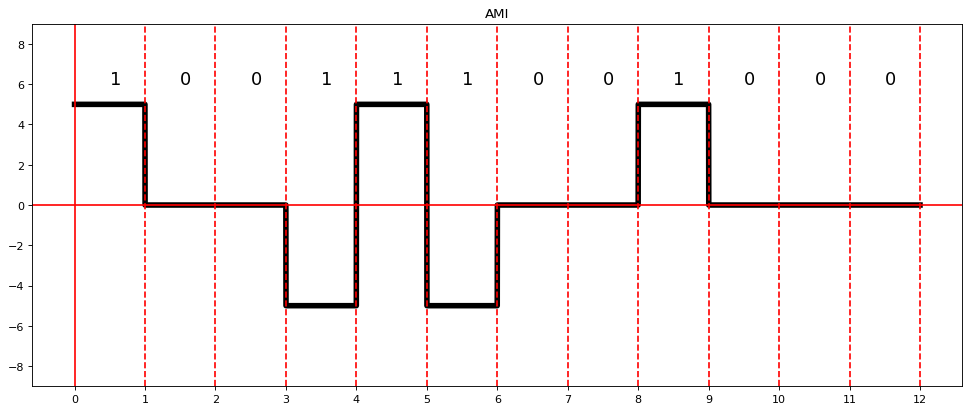

In [ ]:
def AMI(digital_data,highest_voltage,lowest_voltage):
  t = np.arange(0,len(digital_data),0.001)
  y = []
  flag = 0
  prev_voltage = lowest_voltage
  for i in digital_data :
    if i == 1 :
      if prev_voltage == lowest_voltage :   
        recent_voltage = highest_voltage
      else:
        recent_voltage = lowest_voltage
      prev_voltage = recent_voltage
      for j in np.arange(flag,flag+1,0.001):
        y.append(recent_voltage)
      flag=flag+1
    else:
        for j in np.arange(flag,flag+1,0.001):
          y.append(0)
        flag=flag+1

  plot_graph(t,y,digital_data,'AMI')

AMI(digital_data,5,-5)


# **BLOCK_CODING:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools 
from matplotlib.pyplot import figure


In [ ]:
digital_data_b = [1,0,0,1,1,1,0,0,1]

**4B/5B:**

[1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0]
encoded Value :  [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0]


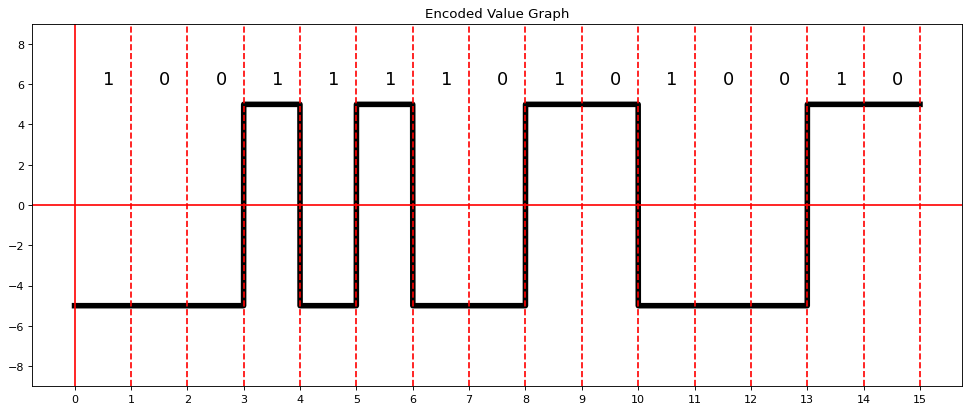

In [ ]:
def block_4b_5b_encode(digital_data):
  mB = 4
  nB = 5
  mapping_codes = {
  # encoding map
  "0000": "11110",
  "0001": "01001",
  "0010": "10100",
  "0011": "10101",
  "0100": "01010",
  "0101": "01011",
  "0110": "01110",
  "0111": "01111",
  "1000": "10010",
  "1001": "10011",
  "1010": "10110",
  "1011": "10111",
  "1100": "11010",
  "1101": "11011",
  "1110": "11100",
  "1111": "11101",


  }
  


  if len(digital_data) % 4 != 0:
    digital_data.append(0)
    for i,value in enumerate(digital_data):
      if len(digital_data) % 4 != 0:
        digital_data.append(0)
      else:
        break


  temp = ""
  output = []
  result = []

  for ind in np.arange(0,len(digital_data),4):
    temp=""
    for i in range(0,4):
      temp=temp+str(digital_data[ind+i])
    output.append(mapping_codes[temp])
    mapped = mapping_codes[temp]
    for p in range(0,5):
      result.append(int(mapped[p]))

  print(digital_data)
  print("encoded Value : " ,result)

  t = np.arange(0,len(result),0.001)
  # print(len(t))
  y = []
  flag = 0
  highest_voltage = highest_amplitude
  lowest_voltage = lowest_amplitude
  prev_voltage=highest_voltage
  for i in result :

    if i == 1 :
      if prev_voltage == lowest_voltage :   
        recent_voltage = highest_voltage
      else:
        recent_voltage = lowest_voltage
      prev_voltage = recent_voltage
      for j in np.arange(flag,flag+1,0.001):
        y.append(recent_voltage)
      flag=flag+1
    else:
      for j in np.arange(flag,flag+1,0.001):     
        y.append(prev_voltage)
      flag=flag+1
  
  plot_graph(t,y,result,'Encoded Value Graph')
  return result




res = block_4b_5b_encode(digital_data_b)

In [ ]:
def block_4b_5b_decode(result):
  mB = 4
  nB = 5
  mapping_codes_2 = {
  "11110": "0000",
  "01001": "0001",
  "10100": "0010",
  "10101": "0011",
  "01010": "0100",
  "01011": "0101",
  "01110": "0110",
  "01111": "0111",
  "10010": "1000",
  "10011": "1001",
  "10110": "1010",
  "10111": "1011",
  "11010": "1100",
  "11011": "1101",
  "11100": "1110",
  "11101": "1111",


  }
  
  decoded = []

  if len(result) % 5 != 0:
    result.append(0)
    for i,value in enumerate(digital_data):
      if len(result) % 5 != 0:
        result.append(0)
      else:
        break


  temp = ""
  output = []
  decoded = []

  for ind in np.arange(0,len(result),5):
    temp=""
    for i in range(0,5):
      temp=temp+str(result[ind+i])
    output.append(mapping_codes_2[temp])
    mapped = mapping_codes_2[temp]
    for p in range(0,4):
      decoded.append(int(mapped[p]))


  print("Decoded Value = " ,decoded)
  # plot_graph(t,y,result,'Encoded Value Graph')

block_4b_5b_decode(res)


Decoded Value =  [1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0]


Output =  [1, 0, 0, 0, 7.5, -8, 0, -7.5, 8, 0, 0, 1]


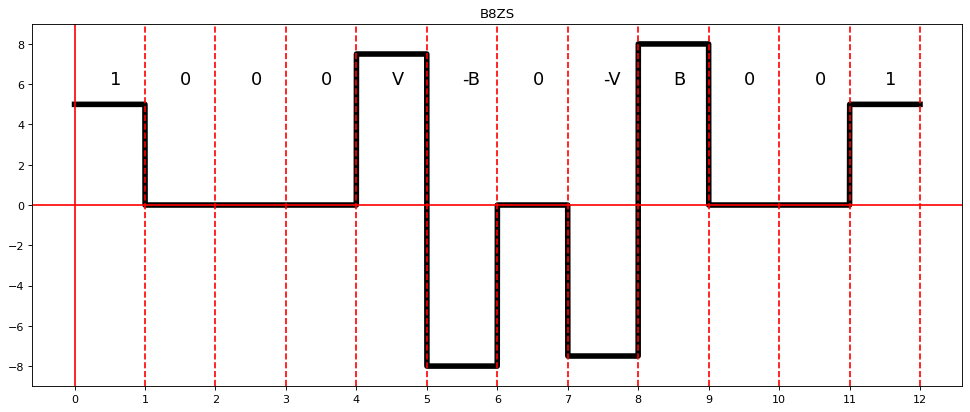

In [ ]:
def B8ZS(digital_data,highest_voltage,lowest_voltage):
  t = np.arange(0,len(digital_data),0.001)
  y = []
  flag = 0
  i=0
  V=highest_voltage + 2.5
  B=highest_voltage + 3
  mapping_value = [0,0,0,V,-B,0,-V,B]
  i=0
  dd =digital_data
  for index in range(0,len(digital_data)+1):
    j=0
    count=0
    if i >= len(digital_data) :
      break
    prev_index = i+j
    for j in range(i+j,i+8):
      if j >= len(dd):
        break
      if digital_data[j] == 0:
        count = count+1
        i=i+1
      else:
        break

    if count == 8 :
      map_index = 0
      for jj in range(prev_index,prev_index+8):
        digital_data[jj] = mapping_value[map_index]
        map_index = map_index+1
    i=i+1
  print("Output = " , digital_data)
  
  t = np.arange(0,len(digital_data),0.001)
  y = []
  flag = 0
  for i in digital_data :
    if i == 1 :
      for j in np.arange(flag,flag+1,0.001):     
        y.append(highest_amplitude)
      flag=flag+1
    elif i == V:
      for j in np.arange(flag,flag+1,0.001):
          y.append(V)
      flag=flag+1
    elif i == -V:
      for j in np.arange(flag,flag+1,0.001):
          y.append(-V)
      flag=flag+1
    elif i == B:
      for j in np.arange(flag,flag+1,0.001):
          y.append(B)
      flag=flag+1
    elif i == -B:
      for j in np.arange(flag,flag+1,0.001):
          y.append(-B)
      flag=flag+1
    else:
        for j in np.arange(flag,flag+1,0.001):
          y.append(0)
        flag=flag+1
  
  figure(figsize=(15, 6), dpi=80)
  ax = plt.gca()
  ax.set_ylim([-9, 9])
  for i in range(0,len(digital_data)):
    if digital_data[i] == V:
      plt.text(0.5+i, 6, 'V', fontsize = 16)
    elif digital_data[i] == -V:
      plt.text(0.5+i, 6, '-V', fontsize = 16)
    elif digital_data[i] == B:
      plt.text(0.5+i, 6, 'B', fontsize = 16)
    elif digital_data[i] == -B:
      plt.text(0.5+i, 6, '-B', fontsize = 16)
    else:
      plt.text(0.5+i, 6, digital_data[i], fontsize = 16)


  plt.plot(t,y,color='black',linewidth = '5')
  plt.xticks(np.arange(0,len(digital_data)+1,1))
  plt.title('B8ZS')

  plt.axhline(y=0, color='r', linestyle='-')
  for i in range(1,len(digital_data)+1):
    plt.axvline(x=i,linestyle="--",color='red')

  plt.axvline(x=0,color='red')

  plt.show()

  # plot_graph(t,)

digital_data_2 = [1,0,0,0,0,0,0,0,0,0,0,1]
B8ZS(digital_data_2,5,-5)